In [1]:
import math
import numpy as np
import scipy
from matplotlib import pyplot as plt


def normalize(vec):
  return vec / np.linalg.norm(vec)


def random_point_on_a_sphere(n):
  return normalize(np.random.normal(0, 1, n))


def gs(vecs):
  proj = lambda of, on: np.dot(of, on) / np.dot(on, on) * on
  e = []

  for vec in vecs:
    e.append(normalize(vec - np.sum([proj(vec, ej) for ej in e], axis=0)))
  
  return e


def build_onb(vec, eps=1e-6):
  n = len(vec)
  E = [np.array([int(i == j) for j in range(n)]) for i in range(n)]
  E.pop(next(i for i, x in enumerate(vec) if not abs(x) < eps))
  return gs([vec, *E])


def random_elipsoid(n, S, sigma_dist, p):
  sigma = np.diag(sigma_dist(n) ** 2)

  e = np.column_stack(build_onb(random_point_on_a_sphere(n)))
  c = math.sqrt(2 * scipy.special.gammaincinv(n / 2, p))
  l = c * sigma ** 0.5

  X = np.random.multivariate_normal(np.zeros(n), e @ sigma @ e.transpose(), S)

  return X, e, l, np.zeros(n)

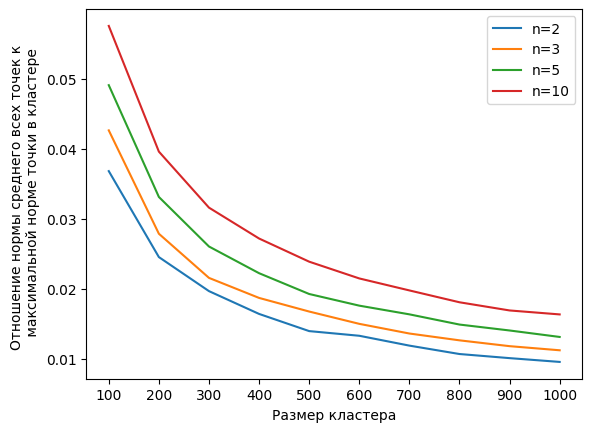

In [8]:
for n in [2, 3, 5, 10]:
  x = []
  y_1 = []
  y_2 = []

  for i in range(1, 11):
    s = i * 100
    d = 0.5
    x.append(s)

    y_mean = []
    y_max = []

    for j in range(1000):
      X, _, _, _ = random_elipsoid(n, s, lambda n : np.random.uniform(1 - d, 1 + d, n), 0.9)
      y_mean.append(np.linalg.norm(np.mean(X, axis=0)))
      y_max.append(np.max(np.linalg.norm(X, axis=1)))

    y_1.append(np.mean(y_mean, axis=0) / np.mean(y_max, axis=0))

  plt.plot(x, y_1, label='n={}'.format(n))

plt.xlabel("Размер кластера")
plt.ylabel("Отношение нормы среднего всех точек к \n максимальной норме точки в кластере")
plt.xticks([i * 100 for i in range(1, 11)])
plt.legend(loc="upper right")
plt.show()